# Regression Lineaire Numpy

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Dataset

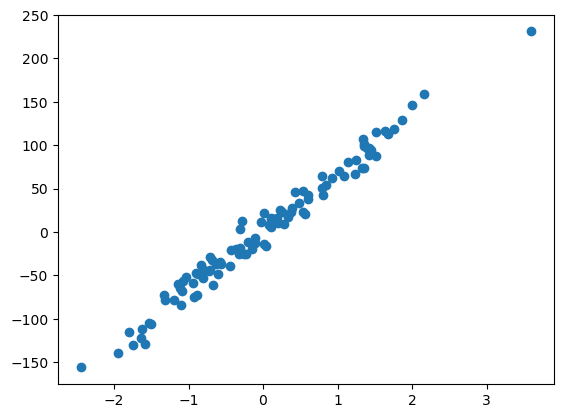

In [4]:
x, y = make_regression(n_samples= 100, n_features=1, noise=10)
plt.scatter(x,y)

In [11]:
y = y.reshape(y.shape[0], 1)

In [12]:
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


In [16]:
# matrice x
X = np.hstack((x, np.ones(x.shape)))

In [17]:
# generer theta aleatoirement
theta = np.random.randn(2, 1)
theta

array([[ 0.24453784],
       [-0.64348873]])

# 2. Modèle Linéaire

In [18]:
# F = X . Theta
def model(X, theta):
    return X.dot(theta)

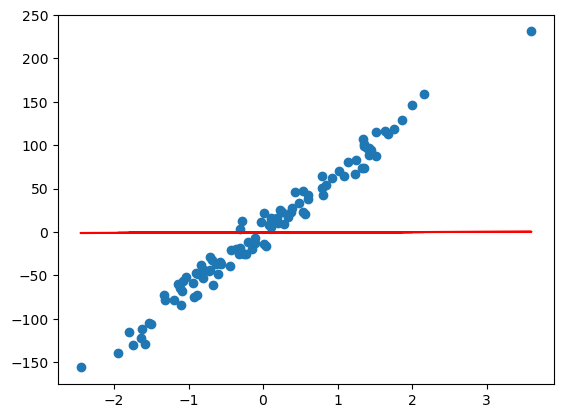

In [22]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='red')

# 3. Fonction Coût

In [23]:
# Erreur quadratique moyenne
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [24]:
cost_function(X, y, theta)

2702.246496510851

# 4. Descent Gradient

In [29]:
def grad(x, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta)-y)

In [41]:
def gradient_descent(X, y, theta, learning_rate, n_iteration):
    cost_history = np.zeros(n_iteration)
    for i in range(0, n_iteration):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history    

# Machine Learning

In [42]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iteration=1000)

In [35]:
theta_final

array([[66.55109385],
       [ 1.27691125]])

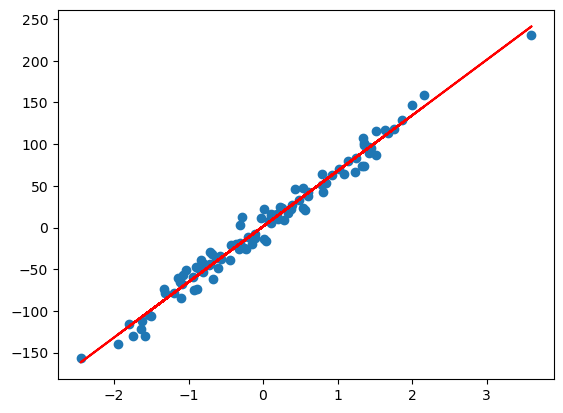

In [36]:
prediction = model(X, theta_final)
plt.scatter(x,y)
plt.plot(x, prediction, c='r')

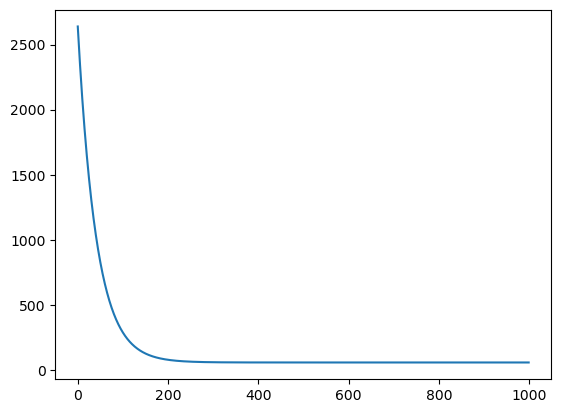

In [43]:
plt.plot(range(1000), cost_history)

In [44]:
def coef_determinataion(y, pred):
    u = ((y-pred)**2).sum()
    v = ((y-y.mean())**2).sum()
    return 1 - u/v

In [45]:
coef_determinataion(y, prediction)

0.9789102930177809